In [23]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Unemployment.csv")
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [25]:
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [26]:
df.columns = ["Region", "Date", "Frequency", "Estimated Unemployment Rate (%)",
                "Estimated Employed", "Estimated Labour Participation Rate (%)", "Area"]

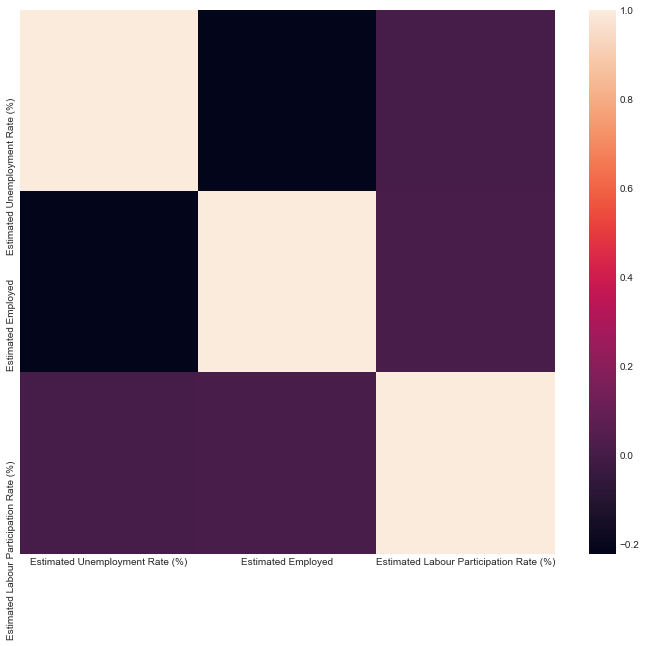

In [27]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())
plt.show()

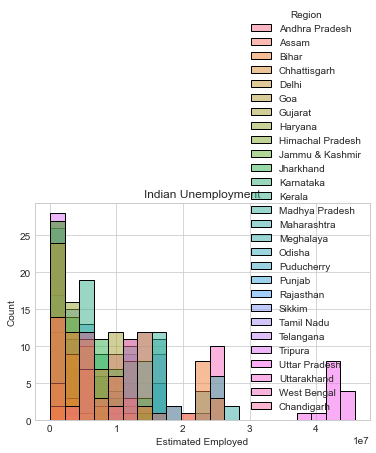

In [28]:
df.columns = ["Region", "Date", "Frequency", "Estimated Unemployment Rate (%)",
                "Estimated Employed", "Estimated Labour Participation Rate (%)", "Area"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)
plt.show()

In [29]:
# Print the column names to check for any discrepancies
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


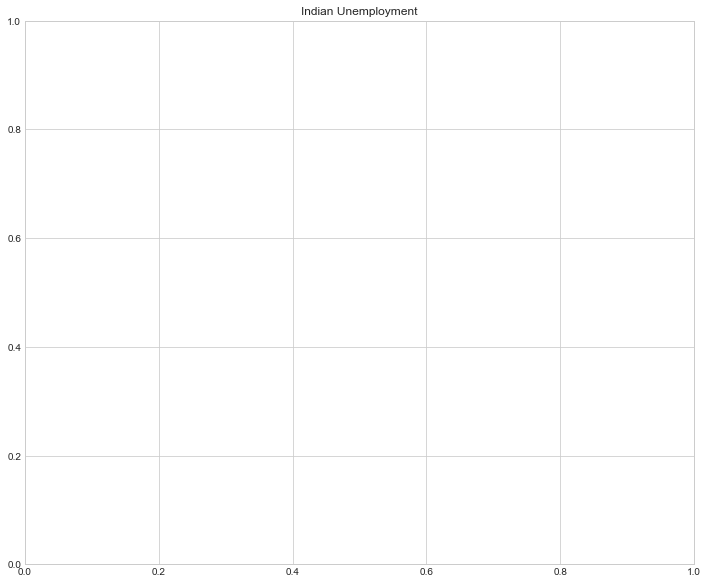

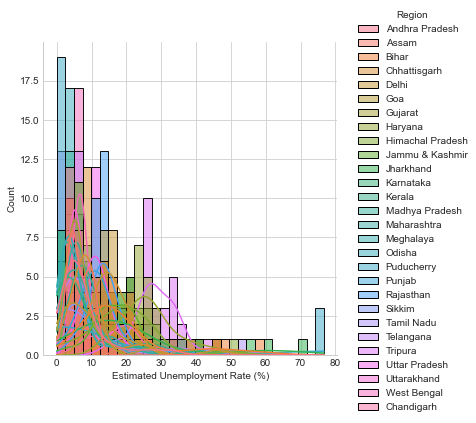

In [30]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.displot(data=df, x="Estimated Unemployment Rate (%)", hue="Region", kde=True)
plt.show()

In [31]:
import pandas as pd
import plotly.express as px

# Read the data and rename columns (if needed)
df.columns = ["Region", "Date", "Frequency", "Estimated Unemployment Rate (%)",
                "Estimated Employed", "Estimated Labour Participation Rate (%)", "Area"]

# Filter and group the data for the Sunburst chart
unemployment = df.groupby(["Region", "Area"], as_index=False)["Estimated Unemployment Rate (%)"].mean()

# Generate the Sunburst chart
figure = px.sunburst(unemployment, path=["Region", "Area"], 
                     values="Estimated Unemployment Rate (%)", 
                     width=700, height=700, color_continuous_scale="RdYlGn", 
                     title="Unemployment Rate in India")

figure.show()